# Problem 7
## 20M10293 Daisuke Kikuta

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Datasets

In [2]:
A = np.array([[200, 10],
              [10,  4.]])

mu = np.array([[1],
               [2]])

def grad(w, A, mu):
    return np.dot(A, w - mu)

def soft_threshold(x, q):
    res = np.zeros(x.shape)

    for i in range(len(x)):
        if   x[i] >  q:
            res[i] = x[i] - q
        elif x[i] < -q:
            res[i] = x[i] + q
        else:
            res[i] = 0.

    return res

def loss(w, A, mu, hp):
    x = w - mu
    return np.dot(x.T, np.dot(A, x)) + hp*np.sum(np.abs(w))

In [3]:
#
# global settings
#
itr = 300
eps = 1e-8
hp  = 0.1

la, v = np.linalg.eigh(A)
L     = np.max(la) # lipschitz constant

w0 = np.zeros(2).reshape(2, 1)

size  = len(w0)
init_array = np.zeros(size).reshape(size, 1)

## AdaGrad
Reference: http://jmlr.org/papers/volume12/duchi11a/duchi11a.pdf

In [4]:
#
# parameters
#
alpha = 0.001

w = w0

loss_adagrad_history = []

for t in range(1, itr+1):
    loss_adagrad_history.append(np.float64(loss(w, A, mu, hp)))

    g = grad(w, A, mu)

    w_tmp = w - alpha/np.sqrt(np.power(g, 2) + eps)*g
    w = soft_threshold(w_tmp, hp/L)

## Adam
Reference: https://arxiv.org/pdf/1412.6980.pdf

In [5]:
#
# parameters
#
beta1 = 0.9
beta2 = 0.999
eta   = 0.001

w     = w0
size  = len(w)
m     = init_array
v     = init_array

loss_adam_history = []

for t in range(1, itr+1):
    loss_adam_history.append(np.float64(loss(w, A, mu, hp)))

    g = grad(w, A, mu)
    m = beta1*m + (1 - beta1)*g
    v = beta2*v + (1 - beta2)*np.power(g, 2)
    m_hat = m/(1 - np.power(beta1, t))
    v_hat = v/(1 - np.power(beta2, t)) 

    w_tmp = w - eta/(np.sqrt(v_hat + eps))*m_hat
    w = soft_threshold(w_tmp, hp/L)

## AdaMax
Reference: https://arxiv.org/pdf/1412.6980.pdf

In [6]:
#
# parameters
#
beta1 = 0.9
beta2 = 0.999
alpha = 0.001

w     = w0
m     = init_array
u     = init_array

loss_adamax_history = []

for t in range(1, itr+1):
    loss_adamax_history.append(np.float64(loss(w, A, mu, hp)))

    g = grad(w, A, mu)
    m = beta1*m + (1 - beta1)*g
    u = np.maximum(beta2*u, np.abs(g))

    w_tmp = w - alpha/(1 - np.power(beta1, t))*m/u

    w = soft_threshold(w_tmp, hp/L)

## Nadam
Reference: https://openreview.net/pdf?id=OM0jvwB8jIp57ZJjtNEZ

In [7]:
#
# parameters
#
beta1 = 0.9
beta2 = 0.999
alpha = 0.001

w     = w0
m     = init_array
n     = init_array
m_hat = init_array

loss_nadam_history = []

for t in range(1, itr+1):
    loss_nadam_history.append(np.float64(loss(w, A, mu, hp)))

    g = grad(w, A , mu)
    m = beta1*m + (1 - beta1)*g
    n = beta2*v + (1 - beta2)*np.power(g, 2)
    m_hat = beta1*m/(1 - np.power(beta1, t)) + (1-beta1)*g/(1-np.power(beta1, t))
    n_hat = beta2*n/(1 - np.power(beta2, t))
        
    w_tmp = w - alpha*m_hat/(np.sqrt(n_hat + eps))
    w = soft_threshold(w_tmp, hp/L)

## AMSGrad
Reference: http://www.satyenkale.com/papers/amsgrad.pdf

In [8]:
#
# parameters
#
beta1 = 0.9
beta2 = 0.999
alpha = 0.001

w     = w0
m     = init_array
v     = init_array
v_hat = init_array

loss_amsgrad_history = []

for t in range(1, itr+1):
    loss_amsgrad_history.append(np.float64(loss(w, A, mu, hp)))
    
    g = grad(w, A, mu)
    m = beta1*m + (1 - beta1)*g
    v = beta2*v + (1 - beta2)*np.power(g, 2)
    v_hat = np.maximum(v_hat, v)

    w_tmp = w - alpha*m/(np.sqrt(v_hat + eps))
    w = soft_threshold(w_tmp, hp/L)

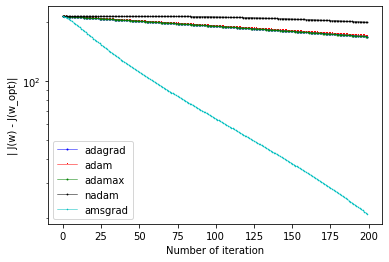

In [9]:
base = min(min(loss_amsgrad_history), min(loss_nadam_history))

show_itr = 200

plt.plot(np.abs(loss_adagrad_history[:show_itr] - base), "bo-", linewidth=0.5, markersize=1, label='adagrad')
plt.plot(np.abs(loss_adam_history[:show_itr] - base),    "r,-", linewidth=0.5, markersize=1, label='adam')
plt.plot(np.abs(loss_adamax_history[:show_itr] - base),  "g8-", linewidth=0.5, markersize=1, label='adamax')
plt.plot(np.abs(loss_nadam_history[:show_itr] - base),   "kp-", linewidth=0.5, markersize=1, label='nadam')
plt.plot(np.abs(loss_amsgrad_history[:show_itr] - base), "c*-", linewidth=0.5, markersize=1, label='amsgrad')

plt.legend()
plt.yscale("log")
plt.xlabel("Number of iteration")
plt.ylabel("| J(w) - J(w_opt)|")
plt.savefig('adaptive_grad.png')